# Introduction
In Part II, simple exploratory data analysis has been performed and the data in the columns has been examined. A new column named "Revenue" has been created and the new DataFrame has been exported as a CSV.

In this section, pretend that we are employees in this store, and answer questions that are relevant to the business.

As such, in this notebook, the following has been done:
1. Import pandas and data visualization libraries
2. Perform in-depth analyses with groupby and resamples

### Step 1: Import the following libraries
- pandas as pd
- matplotlib.pyplot as plt
- seaborn as sns

In [1]:
# Step 1: Import the libraries you need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Step 2: Read the CSV from Part II
Time to read the CSV from Part II here in this notebook!

Similar to Part II:
1. Parse dates as True
2. Make the InvoiceDate column as the index of the DataFrame

In [2]:
# Step 2: Read CSV from Part II
data = pd.read_csv('Revenue.csv', parse_dates=True, index_col=['InvoiceDate'])
display(data)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue,log_base10_Quantity,log_base10_Price,log_base10_Revenue
InvoiceDate,,,,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40,1.079181,0.841985,1.921166
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,1.079181,0.829304,1.908485
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00,1.079181,0.829304,1.908485
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80,1.681241,0.322219,2.003461
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00,1.380211,0.096910,1.477121
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,0.778151,0.322219,1.100371
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,0.602060,0.618048,1.220108
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,0.602060,0.618048,1.220108


### Step 3: Get the value counts of Invoice
<blockquote>Store Boss: "How many invoices do we have and what are the top few?"</blockquote>
Start off by looking at the Invoice column, and tabulate the frequency of the unique Invoices.

Use a pandas method that does a <strong>value count</strong> of the column values

Observe the note of the number of unique Invoices in the dataset, and compare it to the total number of rows in the DataFrame.

In [3]:
# Step 3: Get the value counts of Invoice
data.value_counts(['Invoice'])

Invoice
537434     1350
538071     1302
537638     1202
537237     1194
536876     1186
           ... 
550309        1
550308        1
550198        1
550151        1
C496350       1
Length: 40082, dtype: int64

### Step 4: Get the value counts of Customer ID
<blockquote>Store Boss: "Who is our best customer that bought the most stuff?"</blockquote>
Next, get the value counts of Customer ID to see how many unique customers there are in the DataFrame, and the number of orders the most frequently purchasing customer is. 

In [4]:
# Step 4: Get the value counts of Customer ID
data.value_counts(['Customer ID'])

Customer ID
17841.0        12890
14911.0        11245
12748.0         7228
14606.0         6566
14096.0         5111
               ...  
14106.0            1
13205.0            1
18133.0            1
13215.0            1
15929.0            1
Length: 5878, dtype: int64

### Step 5: Get the value counts of Country
<blockquote>Store Boss: "Where do our customers come from?"</blockquote>
Let's take a look at the countries that the customers come from. 

Get the value counts of the Country column, and see which countries are found in the DataFrame.

In [5]:
# Step 5: Get the value count of Country
data.value_counts(['Country'])

Country             
United Kingdom          958502
EIRE                     17349
Germany                  16694
France                   13940
Netherlands               5088
Spain                     3719
Switzerland               3136
Belgium                   3068
Portugal                  2562
Australia                 1812
Channel Islands           1569
Italy                     1468
Norway                    1436
Sweden                    1338
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Unspecified                752
Greece                     657
Poland                     512
Japan                      485
United Arab Emirates       467
USA                        409
Israel                     369
Hong Kong                  358
Singapore                  339
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA               

### Step 6: Get the value counts of Description
<blockquote>Store Boss: "What is the most commonly purchased item?"</blockquote>
Last value count that is needed for boss - what items get purchased the most?

Do a value count of the items in Description to see which are the top five most purchased items.

In [6]:
# Step 6: Get the value count of Description
data.value_counts(['Description']).head(5)

Description                       
WHITE HANGING HEART T-LIGHT HOLDER    5778
REGENCY CAKESTAND 3 TIER              4061
JUMBO BAG RED RETROSPOT               3391
ASSORTED COLOUR BIRD ORNAMENT         2938
PARTY BUNTING                         2740
dtype: int64

### Step 7: Get the sum of the revenue by country
<blockquote>Store Boss: "How much revenue in total did we get from each country?"</blockquote>
To find this out, two things need to be performed:

1. Perform a groupby operation by country, with a sum method
2. Sort the resulting DataFrame in a descending order

In [7]:
# Step 7: Get the sum of revenue by country with groupby
sum_revenue = data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print(sum_revenue)

Country
United Kingdom          1.787135e+07
EIRE                    6.644318e+05
Netherlands             5.542323e+05
Germany                 4.312625e+05
France                  3.569446e+05
Australia               1.699681e+05
Spain                   1.091785e+05
Switzerland             1.010113e+05
Sweden                  9.190372e+04
Denmark                 6.986219e+04
Belgium                 6.575342e+04
Norway                  6.010962e+04
Portugal                5.801665e+04
Japan                   4.713839e+04
Channel Islands         4.499676e+04
Italy                   3.255042e+04
Finland                 2.992554e+04
Singapore               2.531706e+04
Cyprus                  2.498013e+04
Hong Kong               2.389432e+04
Austria                 2.361301e+04
Greece                  1.909619e+04
Israel                  1.133466e+04
United Arab Emirates    1.109763e+04
Unspecified             1.093601e+04
Poland                  1.090245e+04
USA                     8.3668

### Step 8: Resample the DataFrame by month and obtain sum of Quantity and Revenue
When plotted the time series for Quantity in Part II, it presented a few challenges:

1. the time stamps are repeated, i.e. multiple purchases are happening
2. the range in purchase quantity is large
3. the timescale is too granular

As such, take the median of either each hour/day's purchase to plot instead. 

Resampling is useful in this case, where we get the sum/median/mean of the quantities over time. 

What to do:

1. Resample the DataFrame by month ('M'), along with summing
2. Take only the "Quantity" and "Revenue" columns

In [8]:
# Step 8: Get the resample by month, containing the sum of the quantities
data_monthly = data.resample('M').sum()
columns = ['Quantity', 'Revenue']
data_monthly[columns]

,Quantity,Revenue
InvoiceDate,,
2009-12-31,426981,825685.760
2010-01-31,391525,652708.502
2010-02-28,382782,553713.306
2010-03-31,527401,833570.131
2010-04-30,368198,681528.992
2010-05-31,397206,659858.860
2010-06-30,408636,752270.140
2010-07-31,338920,650712.940
2010-08-31,473420,697274.910


### Step 9: Plot Quantity over the months
<blockquote>Store Boss: "How many items did we sell over time?"</blockquote>
Using the monthly resample DataFrame from Step 8, plot Quantity over time.

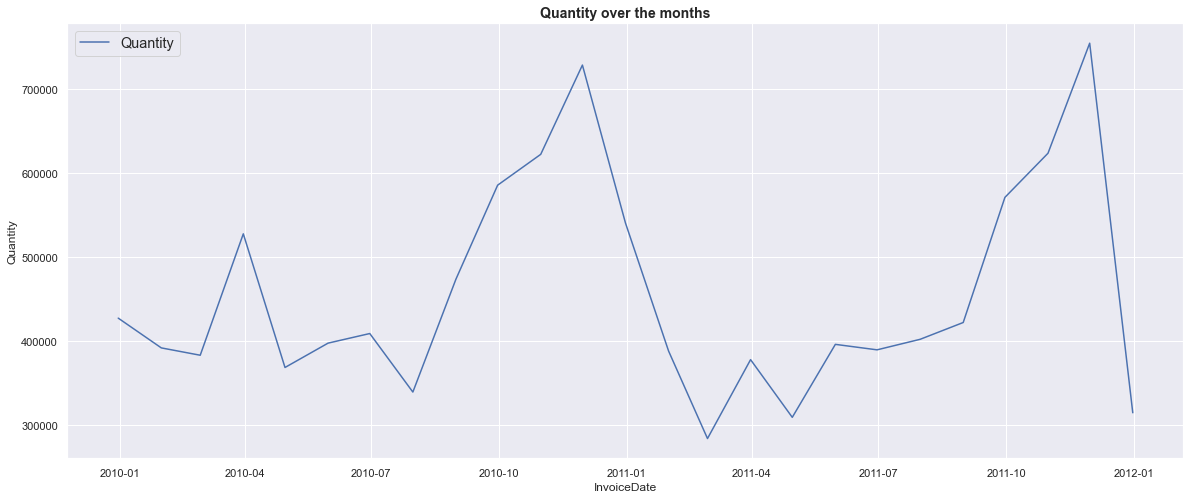

In [9]:
# Step 9: Plot Quantity over the months
labels = ["Quantity"] 
plt.figure(figsize = (20, 8))
plt.plot(data_monthly.index.values, data_monthly["Quantity"])

# chart formatting elements: title, labels and legend
plt.title("Quantity over the months", fontsize = 14, fontweight = "bold")
plt.ylabel("Quantity")
plt.xlabel("InvoiceDate")
plt.legend(labels = labels, fontsize = "large")
plt.show()

### Step 10: Plot Revenue over the months
<blockquote>Store Boss: "How much money did we make over time?"</blockquote>
Similarly, using the monthly resample DataFrame from Step 8, plot Revenue over time.

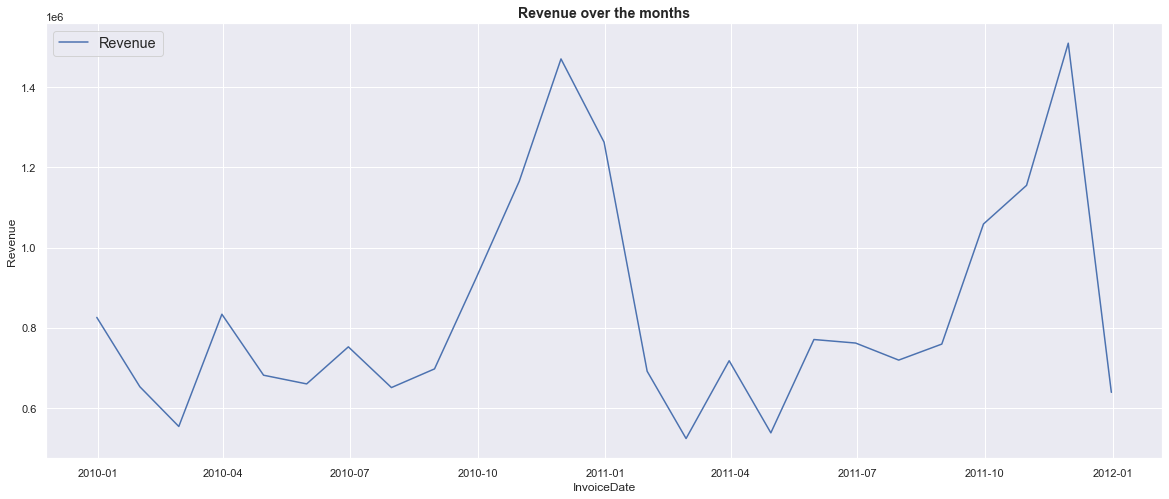

In [10]:
# Step 10: Plot Revenue over the months
labels = ["Revenue"] 
plt.figure(figsize = (20, 8))
plt.plot(data_monthly.index.values, data_monthly["Revenue"])

# chart formatting elements: title, labels and legend
plt.title("Revenue over the months", fontsize = 14, fontweight = "bold")
plt.ylabel("Revenue")
plt.xlabel("InvoiceDate")
plt.legend(labels = labels, fontsize = "large")
plt.show()

The two graphs are relatively similar, and it gives us an idea of:

1. When the most critical period where you need to have enough stock is
2. When the store will make the most money

## Text analysis

<blockquote>Store Boss: "What is the most common colors and items that we sell?"</blockquote>

Move on to the last section, where simple text analysis has been performed on the items in Description. 

More specifically, a wordcloud will be used to visualize the most common words for the store boss.

### Step 11: Import wordcloud library

In [11]:
# Step 11: Import wordcloud library
import wordcloud

### Step 12: Get a list of containing all of the items sold so far
Since the Description column currently contains all of the items bought in the store, a list of unique values is needed, i.e. no duplicates, in the DataFrame's Description column. 

There are two ways to do this: 

1. turn the Description column into a set {}
2. get a unique list of items from column using a pandas method

In [12]:
# Step 12: Get a list fo unique items from Description column
data.Description.unique()

array(['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS',
       ' WHITE CHERRY LIGHTS', ..., 'SET 10 CARDS SWIRLY XMAS TREE 17104',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

### Step 13: Join the items in the list into a huge string
Here are the steps needed after getting the list of unique items.

1. turn all of the strings in the list to lowercase
2. join all of the items in the list to become a huge string

In [13]:
# Step 13: turn the items in list to lowercase and join the items in the list into a string 
desc = data.Description.unique()
items = [x.lower() for x in desc]
text = (" ".join(items))
print(text)

15cm christmas glass ball 20 lights pink cherry lights  white cherry lights record frame 7" single size  strawberry ceramic trinket box pink doughnut trinket pot  save the planet mug fancy font home sweet home doormat cat bowl  dog bowl , chasing ball design heart measuring spoons large lunchbox with cutlery fairy cakes  door mat black flock  love building block word home building block word assorted colour bird ornament  peace wooden block letters christmas craft white fairy  heart ivory trellis large heart filigree dove large full english breakfast plate pizza plate in box black diner wall clock set of 3 black flying ducks area patrolled metal sign please one person  metal sign bath building block word classic white frame small marshmallows pink bowl biscuits small bowl light blue scottie dog hot water bottle christmas craft heart decorations christmas craft heart stocking  party cone christmas decoration  peace small wood letters joy large wood letters cinammon & orange wreath eucal

### Step 14: Declare a variable containing stopwords from wordcloud
Declare a variable and assign the STOPWORDS found in the wordcloud library. 

STOPWORDS is a set containing strings of commonly found words, e.g., "a", "the", "and", etc. 

Remove stopwords from text will help in improving the quality of the data as there are no words that are not as useful to the wordcloud analysis.

In [14]:
# Step 14: Declare a variable containing STOPWORDS from wordcloud library
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

### Step 15: Create your wordcloud
Finally! Time to create wordcloud.  

1. From the wordcloud library, create a WordCloud object with the following parameters:
    - stopwords = the variable containing stopwords
    - max_words = 50 (adjustable)
2. Use the imshow method from matplotlib.pyplot to show the image of wordcloud

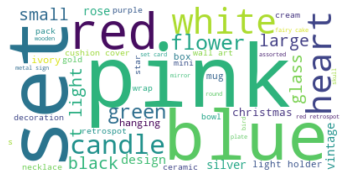

In [16]:
# Step 15: Create and display wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords = stopwords, max_words = 50, background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### End of Part III
In this part, a few analyses have been performed for the store boss. 

Next up, customer segmentation analysis with the customer purchase habits will be performed.